# Markowitz portfolio optimization


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 200)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from library.dataset import load_train_test_dataset
from library.correlations import get_correlation_matrices, N_REMAINING_COMPONENTS


observations_train, observations_test, df_price_train, df_price_test = load_train_test_dataset()
correlations_train, correlations_test = get_correlation_matrices(observations_train, True, N_REMAINING_COMPONENTS, N_REMAINING_COMPONENTS), get_correlation_matrices(observations_test, True, N_REMAINING_COMPONENTS, N_REMAINING_COMPONENTS)

Original number of tickers: 246
Drop tickers: ['IRAO']
Start date = 2013-12-16
Filtered number of tickers: 30
Stocks: ['AFLT', 'ALRS', 'GCHE', 'HYDR', 'LKOH', 'LSRG', 'MGNT', 'MOEX', 'MRKC', 'MRKP', 'MSNG', 'MSRS', 'MTLR', 'MTLRP', 'MTSS', 'NVTK', 'PHOR', 'PIKK', 'POLY', 'RTKM', 'RTKMP', 'SBER', 'SBERP', 'TATN', 'TATNP', 'TGKA', 'TRMK', 'TRNFP', 'UTAR', 'VTBR']
DataFrame size after merge: 2255
DataFrame size after removing some years: 1753

2015 year: 246 observations
2016 year: 252 observations
2017 year: 252 observations
2018 year: 246 observations
2019 year: 252 observations
2020 year: 250 observations
2021 year: 255 observations

Train: 1010. Test: 472. Test ratio: 0.3184885290148448


In [11]:
from library.markowitz import get_markowitz_w, MarkowitzMethod
from library.backtest import Strategy, compare_strategies, PortfolioTrainTestStats


def get_strategy(name, corr_name, method, parameters, Sigmas_train, Sigmas_test) -> Strategy:
    return Strategy(
        name=f'{name} ({corr_name})',
        get_train_w=lambda: get_markowitz_w(observations_train, method=method, parameters=parameters, Sigmas=Sigmas_train),
        get_test_w=lambda: get_markowitz_w(observations_test, method=method, parameters=parameters, Sigmas=Sigmas_test)
    )


def try_method(method: MarkowitzMethod, parameters: list[dict], names: list[str], cache_folder: str, **kwargs) -> list[PortfolioTrainTestStats]:
    strategies = []

    for Sigmas_train, Sigmas_test, corr_name in zip(
        [correlations_train.Sigmas, correlations_train.Sigmas_denoised, correlations_train.Sigmas_detoned, correlations_train.Sigmas_detoned_denoised],
        [correlations_test.Sigmas, correlations_test.Sigmas_denoised, correlations_test.Sigmas_detoned, correlations_test.Sigmas_detoned_denoised],
        ['Sigma', 'Sigma_denoised', 'Sigma_detoned', 'Sigma_denoised_detoned']
    ):
        for params, name in zip(parameters, names):
            strategies.append(
                get_strategy(name, corr_name, method, params, Sigmas_train, Sigmas_test)
            )

    return compare_strategies(strategies, observations_train, observations_test, cache_folder=cache_folder, **kwargs)

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

Markowitz with mu=0% (negative) (Sigma)
                   portfolio_train   baseline_train   portfolio_test    baseline_test
return             11.49% ± 11.00%  13.93% ± 12.00%  19.47% ± 14.76%  21.06% ± 18.24%
sharpe ratio              1.044064         1.161015         1.319133         1.154165
difference         -2.44% ± 10.95%    0.00% ± 0.00%  -1.59% ± 16.59%    0.00% ± 0.00%
information ratio        -0.223004              NaN        -0.095869              NaN

Markowitz with mu=15% (negative) (Sigma)
                   portfolio_train   baseline_train   portfolio_test    baseline_test
return             12.60% ± 11.18%  13.93% ± 12.00%  19.41% ± 14.38%  21.06% ± 18.24%
sharpe ratio               1.12746         1.161015         1.350059         1.154165
difference         -1.33% ± 11.06%    0.00% ± 0.00%  -1.65% ± 16.62%    0.00% ± 0.00%
information ratio        -0.119921              NaN        -0.099205              NaN

Markowitz with mu=0% (negative) (Sigma_denoised)
        

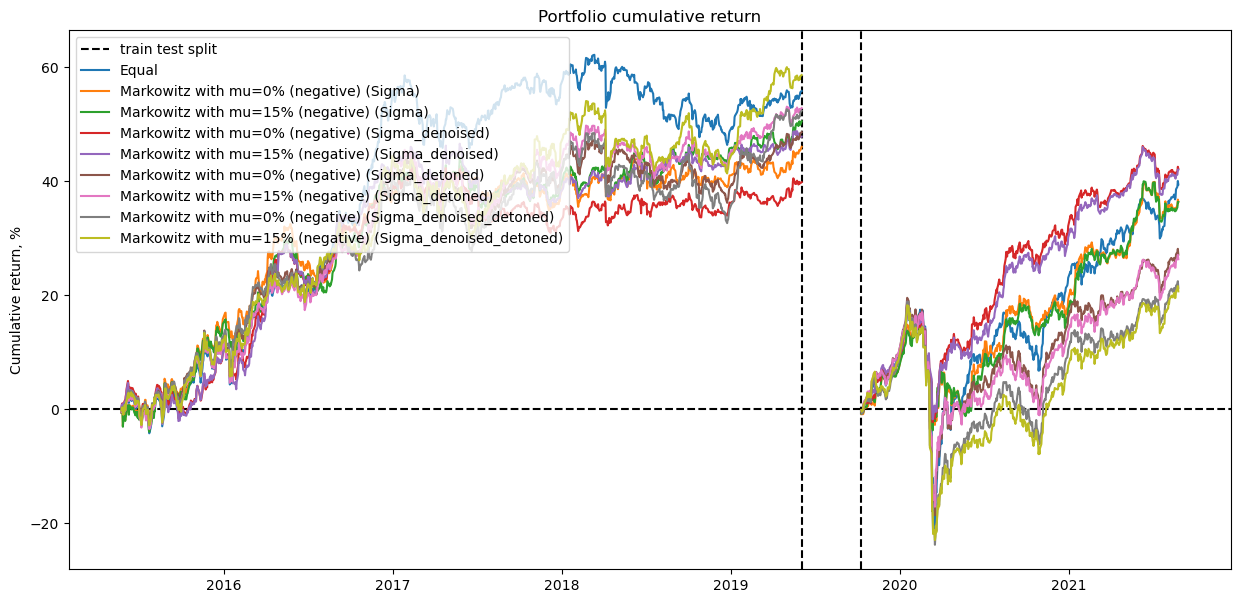

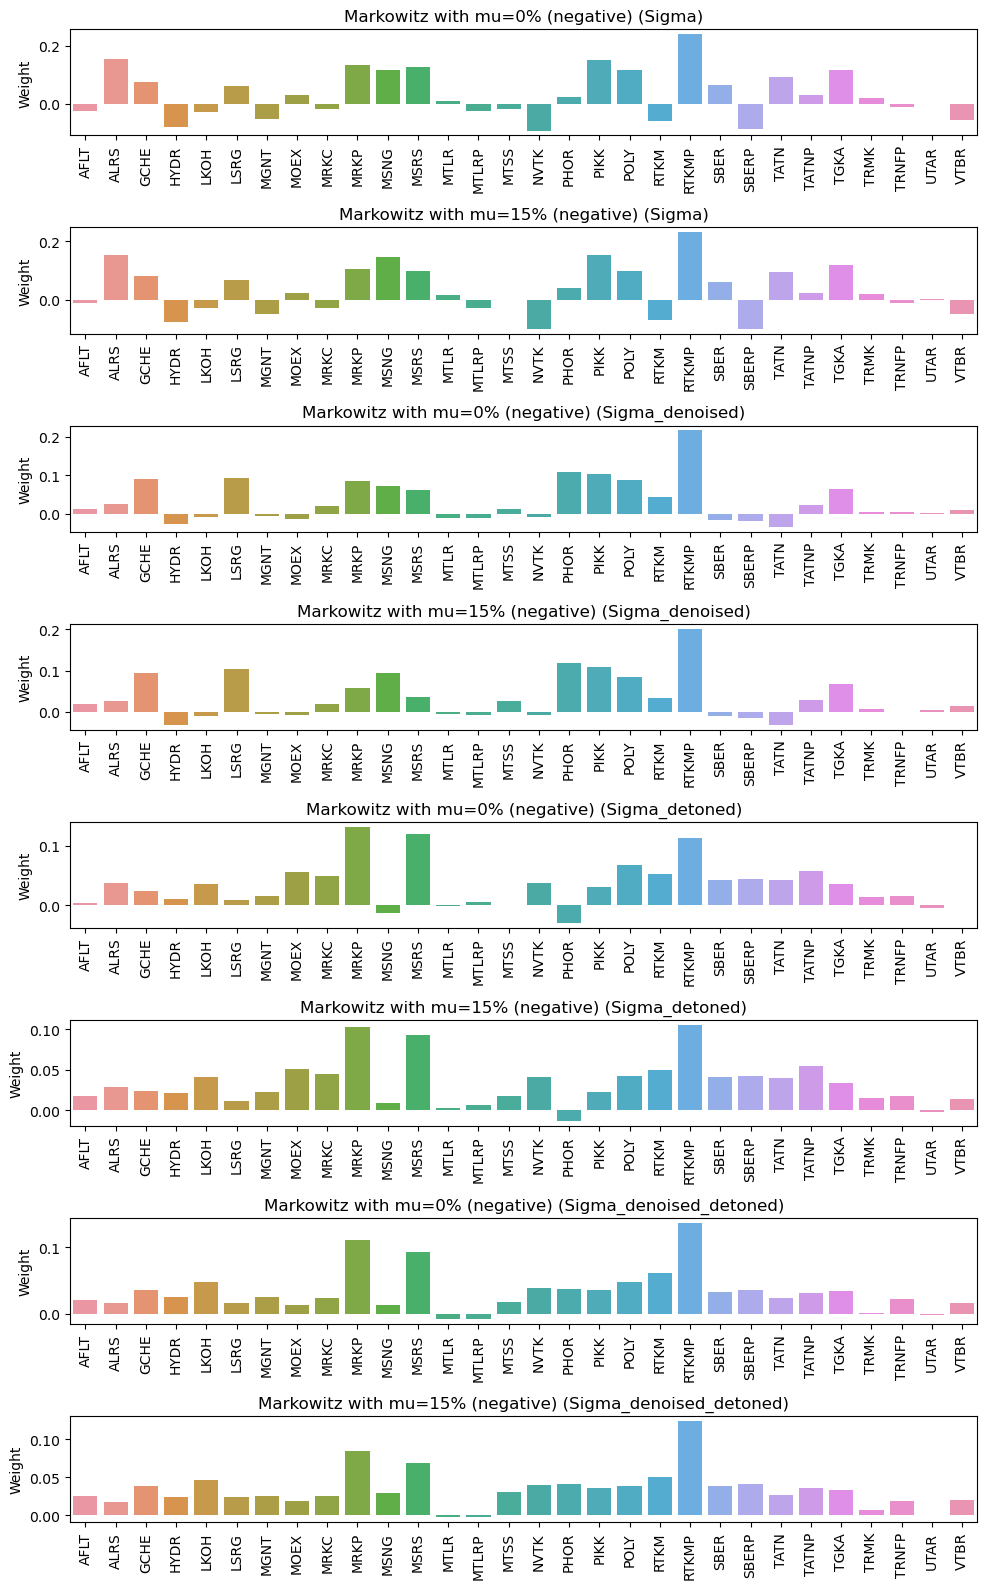

In [13]:
params = [0, 15]
parameters = [{'mu_year_pct': mu_year_pct} for mu_year_pct in params]
names = [f'Markowitz with mu={mu_year_pct}% (negative)' for mu_year_pct in params]
min_variance_given_mu_stats = try_method(MarkowitzMethod.MinVarianceGivenMuMaybeNegative, parameters, names, 'cache/markowitz_mu_negative/', use_cache=False)

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

Fail to optimize (no success): returns=array([0.00468875, 0.00260956, 0.00038545, 0.00546783, 0.00407126,
       0.00445817, 0.00606648, 0.00584938, 0.00440661, 0.00598045,
       0.00483093, 0.004392  , 0.00208514, 0.00369855, 0.00292094,
       0.00512219, 0.00192401, 0.00376298, 0.00705752, 0.00340609,
       0.00424255, 0.00279532, 0.00267408, 0.00491087, 0.00496381,
       0.00516495, 0.00562462, 0.00020757, 0.00197292, 0.0039057 ])
Fail to optimize (no success): returns=array([0.00418476, 0.00146352, 0.00017348, 0.00479163, 0.00220858,
       0.00392356, 0.00533381, 0.00463814, 0.00388699, 0.00530763,
       0.0040099 , 0.00326719, 0.0022677 , 0.00499171, 0.00240078,
       0.00322251, 0.00168327, 0.00309723, 0.00706314, 0.00303678,
       0.00409567, 0.00177143, 0.00194824, 0.00277392, 0.0035363 ,
       0.00385893, 0.00518398, 0.00035984, 0.00177728, 0.00276782])
Fail to optimize (no success): returns=array([3.19319776e-03, 2.20593670e-03, 6.00566591e-05, 4.12048155e-03,
      

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

Fail to optimize (no success): returns=array([0.00468875, 0.00260956, 0.00038545, 0.00546783, 0.00407126,
       0.00445817, 0.00606648, 0.00584938, 0.00440661, 0.00598045,
       0.00483093, 0.004392  , 0.00208514, 0.00369855, 0.00292094,
       0.00512219, 0.00192401, 0.00376298, 0.00705752, 0.00340609,
       0.00424255, 0.00279532, 0.00267408, 0.00491087, 0.00496381,
       0.00516495, 0.00562462, 0.00020757, 0.00197292, 0.0039057 ])
Fail to optimize (no success): returns=array([0.00418476, 0.00146352, 0.00017348, 0.00479163, 0.00220858,
       0.00392356, 0.00533381, 0.00463814, 0.00388699, 0.00530763,
       0.0040099 , 0.00326719, 0.0022677 , 0.00499171, 0.00240078,
       0.00322251, 0.00168327, 0.00309723, 0.00706314, 0.00303678,
       0.00409567, 0.00177143, 0.00194824, 0.00277392, 0.0035363 ,
       0.00385893, 0.00518398, 0.00035984, 0.00177728, 0.00276782])
Fail to optimize (no success): returns=array([3.19319776e-03, 2.20593670e-03, 6.00566591e-05, 4.12048155e-03,
      

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

Fail to optimize (no success): returns=array([0.00468875, 0.00260956, 0.00038545, 0.00546783, 0.00407126,
       0.00445817, 0.00606648, 0.00584938, 0.00440661, 0.00598045,
       0.00483093, 0.004392  , 0.00208514, 0.00369855, 0.00292094,
       0.00512219, 0.00192401, 0.00376298, 0.00705752, 0.00340609,
       0.00424255, 0.00279532, 0.00267408, 0.00491087, 0.00496381,
       0.00516495, 0.00562462, 0.00020757, 0.00197292, 0.0039057 ])
Fail to optimize (no success): returns=array([0.00418476, 0.00146352, 0.00017348, 0.00479163, 0.00220858,
       0.00392356, 0.00533381, 0.00463814, 0.00388699, 0.00530763,
       0.0040099 , 0.00326719, 0.0022677 , 0.00499171, 0.00240078,
       0.00322251, 0.00168327, 0.00309723, 0.00706314, 0.00303678,
       0.00409567, 0.00177143, 0.00194824, 0.00277392, 0.0035363 ,
       0.00385893, 0.00518398, 0.00035984, 0.00177728, 0.00276782])
Fail to optimize (no success): returns=array([3.19319776e-03, 2.20593670e-03, 6.00566591e-05, 4.12048155e-03,
      

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

Fail to optimize (no success): returns=array([0.00468875, 0.00260956, 0.00038545, 0.00546783, 0.00407126,
       0.00445817, 0.00606648, 0.00584938, 0.00440661, 0.00598045,
       0.00483093, 0.004392  , 0.00208514, 0.00369855, 0.00292094,
       0.00512219, 0.00192401, 0.00376298, 0.00705752, 0.00340609,
       0.00424255, 0.00279532, 0.00267408, 0.00491087, 0.00496381,
       0.00516495, 0.00562462, 0.00020757, 0.00197292, 0.0039057 ])
Fail to optimize (no success): returns=array([0.00418476, 0.00146352, 0.00017348, 0.00479163, 0.00220858,
       0.00392356, 0.00533381, 0.00463814, 0.00388699, 0.00530763,
       0.0040099 , 0.00326719, 0.0022677 , 0.00499171, 0.00240078,
       0.00322251, 0.00168327, 0.00309723, 0.00706314, 0.00303678,
       0.00409567, 0.00177143, 0.00194824, 0.00277392, 0.0035363 ,
       0.00385893, 0.00518398, 0.00035984, 0.00177728, 0.00276782])
Fail to optimize (no success): returns=array([3.19319776e-03, 2.20593670e-03, 6.00566591e-05, 4.12048155e-03,
      

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

Markowitz with mu=0% (Sigma)
                   portfolio_train   baseline_train   portfolio_test    baseline_test
return             12.15% ± 11.39%  13.93% ± 12.00%  14.07% ± 16.71%  21.06% ± 18.24%
sharpe ratio              1.066275         1.161015          0.84169         1.154165
difference          -1.78% ± 3.86%    0.00% ± 0.00%   -6.99% ± 6.80%    0.00% ± 0.00%
information ratio         -0.46143              NaN        -1.028227              NaN

Markowitz with mu=15% (Sigma)
                   portfolio_train   baseline_train   portfolio_test    baseline_test
return             15.00% ± 11.44%  13.93% ± 12.00%  16.93% ± 16.87%  21.06% ± 18.24%
sharpe ratio              1.310471         1.161015         1.003574         1.154165
difference           1.07% ± 3.41%    0.00% ± 0.00%   -4.12% ± 6.46%    0.00% ± 0.00%
information ratio         0.313159              NaN        -0.638582              NaN

Markowitz with mu=0% (Sigma_denoised)
                   portfolio_train   base

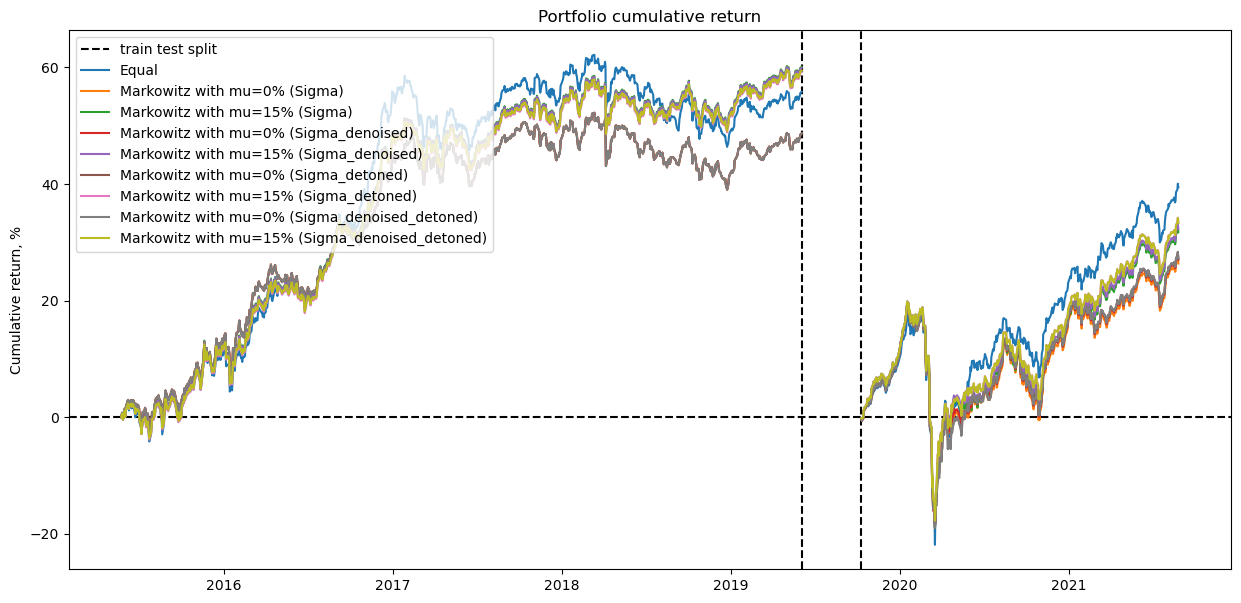

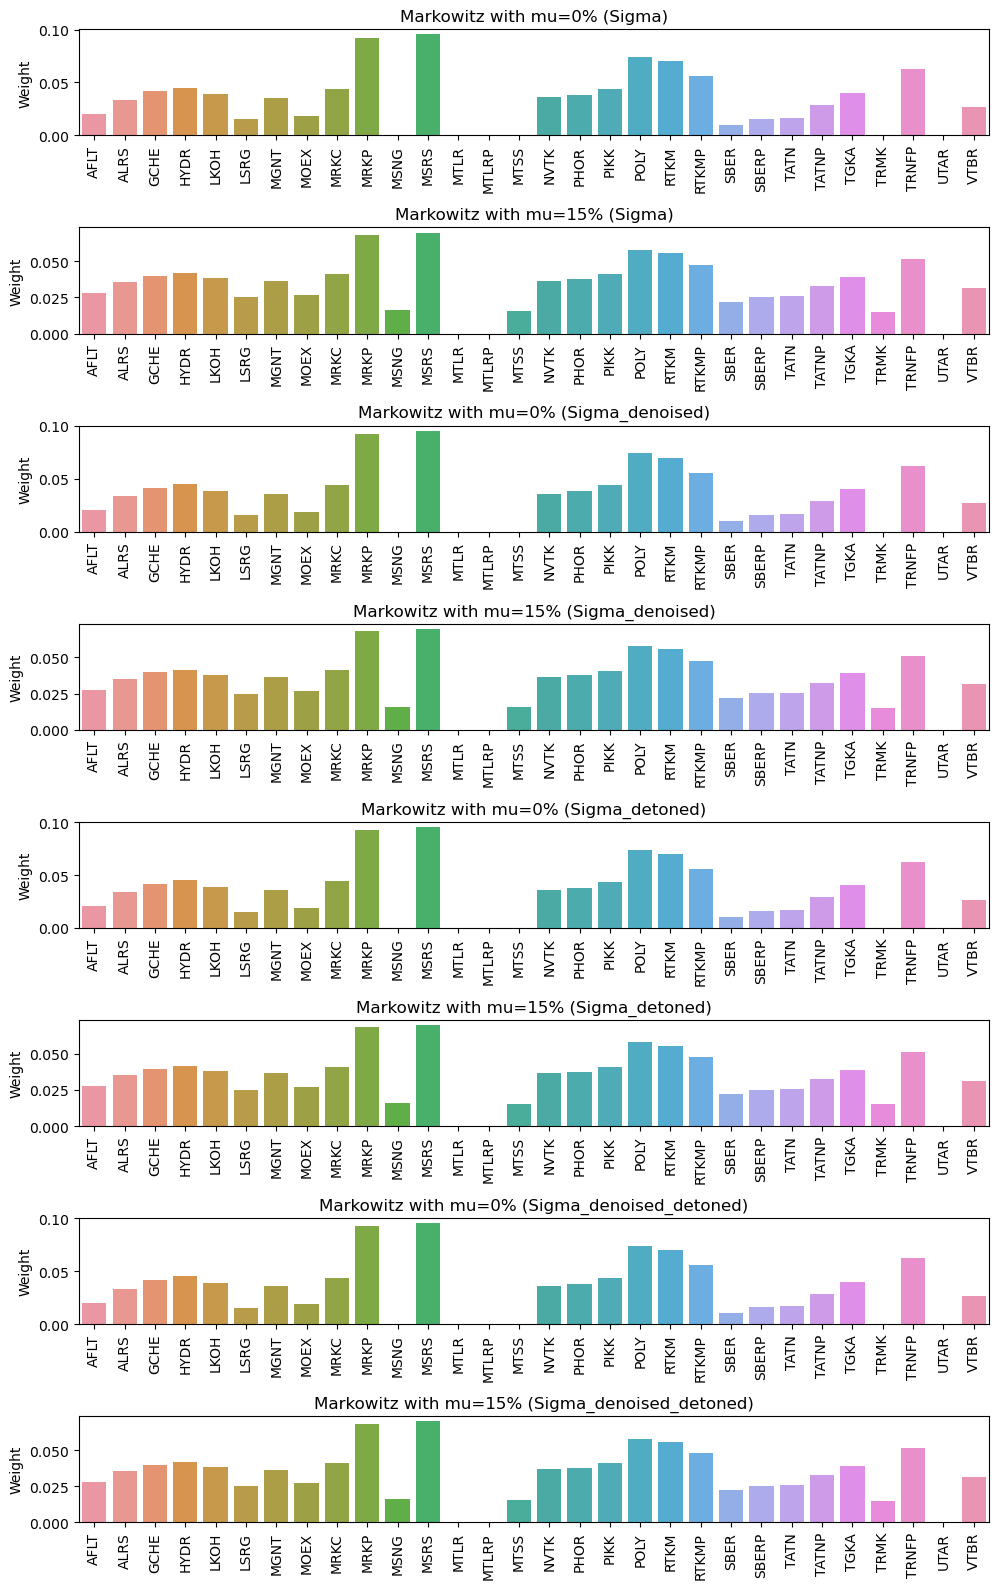

In [12]:
params = [0, 15]
parameters = [{'mu_year_pct': mu_year_pct} for mu_year_pct in params]
names = [f'Markowitz with mu={mu_year_pct}%' for mu_year_pct in params]
min_variance_given_mu_stats = try_method(MarkowitzMethod.MinVarianceGivenMu, parameters, names, 'cache/markowitz_mu/', use_cache=True)

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

d:\Learning\3_course\Course work\neurotrader\research\library\backtest.py:84: RuntimeWarning: invalid value encountered in double_scalars
  return mean, std, mean / std
d:\Learning\3_course\Course work\neurotrader\research\library\backtest.py:84: RuntimeWarning: invalid value encountered in double_scalars
  return mean, std, mean / std


  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

d:\Learning\3_course\Course work\neurotrader\research\library\backtest.py:84: RuntimeWarning: invalid value encountered in double_scalars
  return mean, std, mean / std
d:\Learning\3_course\Course work\neurotrader\research\library\backtest.py:84: RuntimeWarning: invalid value encountered in double_scalars
  return mean, std, mean / std


  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

Markowitz with q=0.0 (Sigma)
                   portfolio_train   baseline_train   portfolio_test    baseline_test
return             14.01% ± 11.98%  13.93% ± 12.00%  18.68% ± 16.37%  21.06% ± 18.24%
sharpe ratio              1.169169         1.161015         1.141756         1.154165
difference           0.08% ± 0.51%    0.00% ± 0.00%   -2.37% ± 5.22%    0.00% ± 0.00%
information ratio         0.151299              NaN        -0.454659              NaN

Markowitz with q=0.2 (Sigma)
                   portfolio_train   baseline_train   portfolio_test    baseline_test
return             32.96% ± 25.09%  13.93% ± 12.00%  26.68% ± 21.07%  21.06% ± 18.24%
sharpe ratio              1.313683         1.161015         1.266531         1.154165
difference         19.03% ± 21.34%    0.00% ± 0.00%   5.63% ± 15.29%    0.00% ± 0.00%
information ratio         0.891405              NaN         0.368079              NaN

Markowitz with q=0.4 (Sigma)
                   portfolio_train   baseline_train

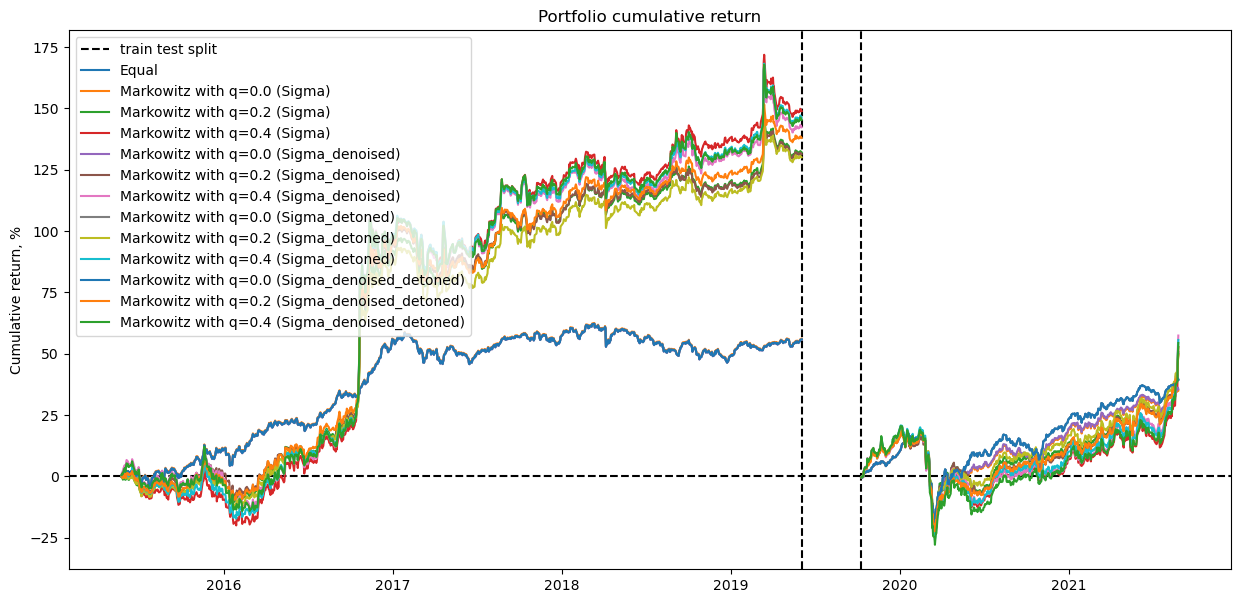

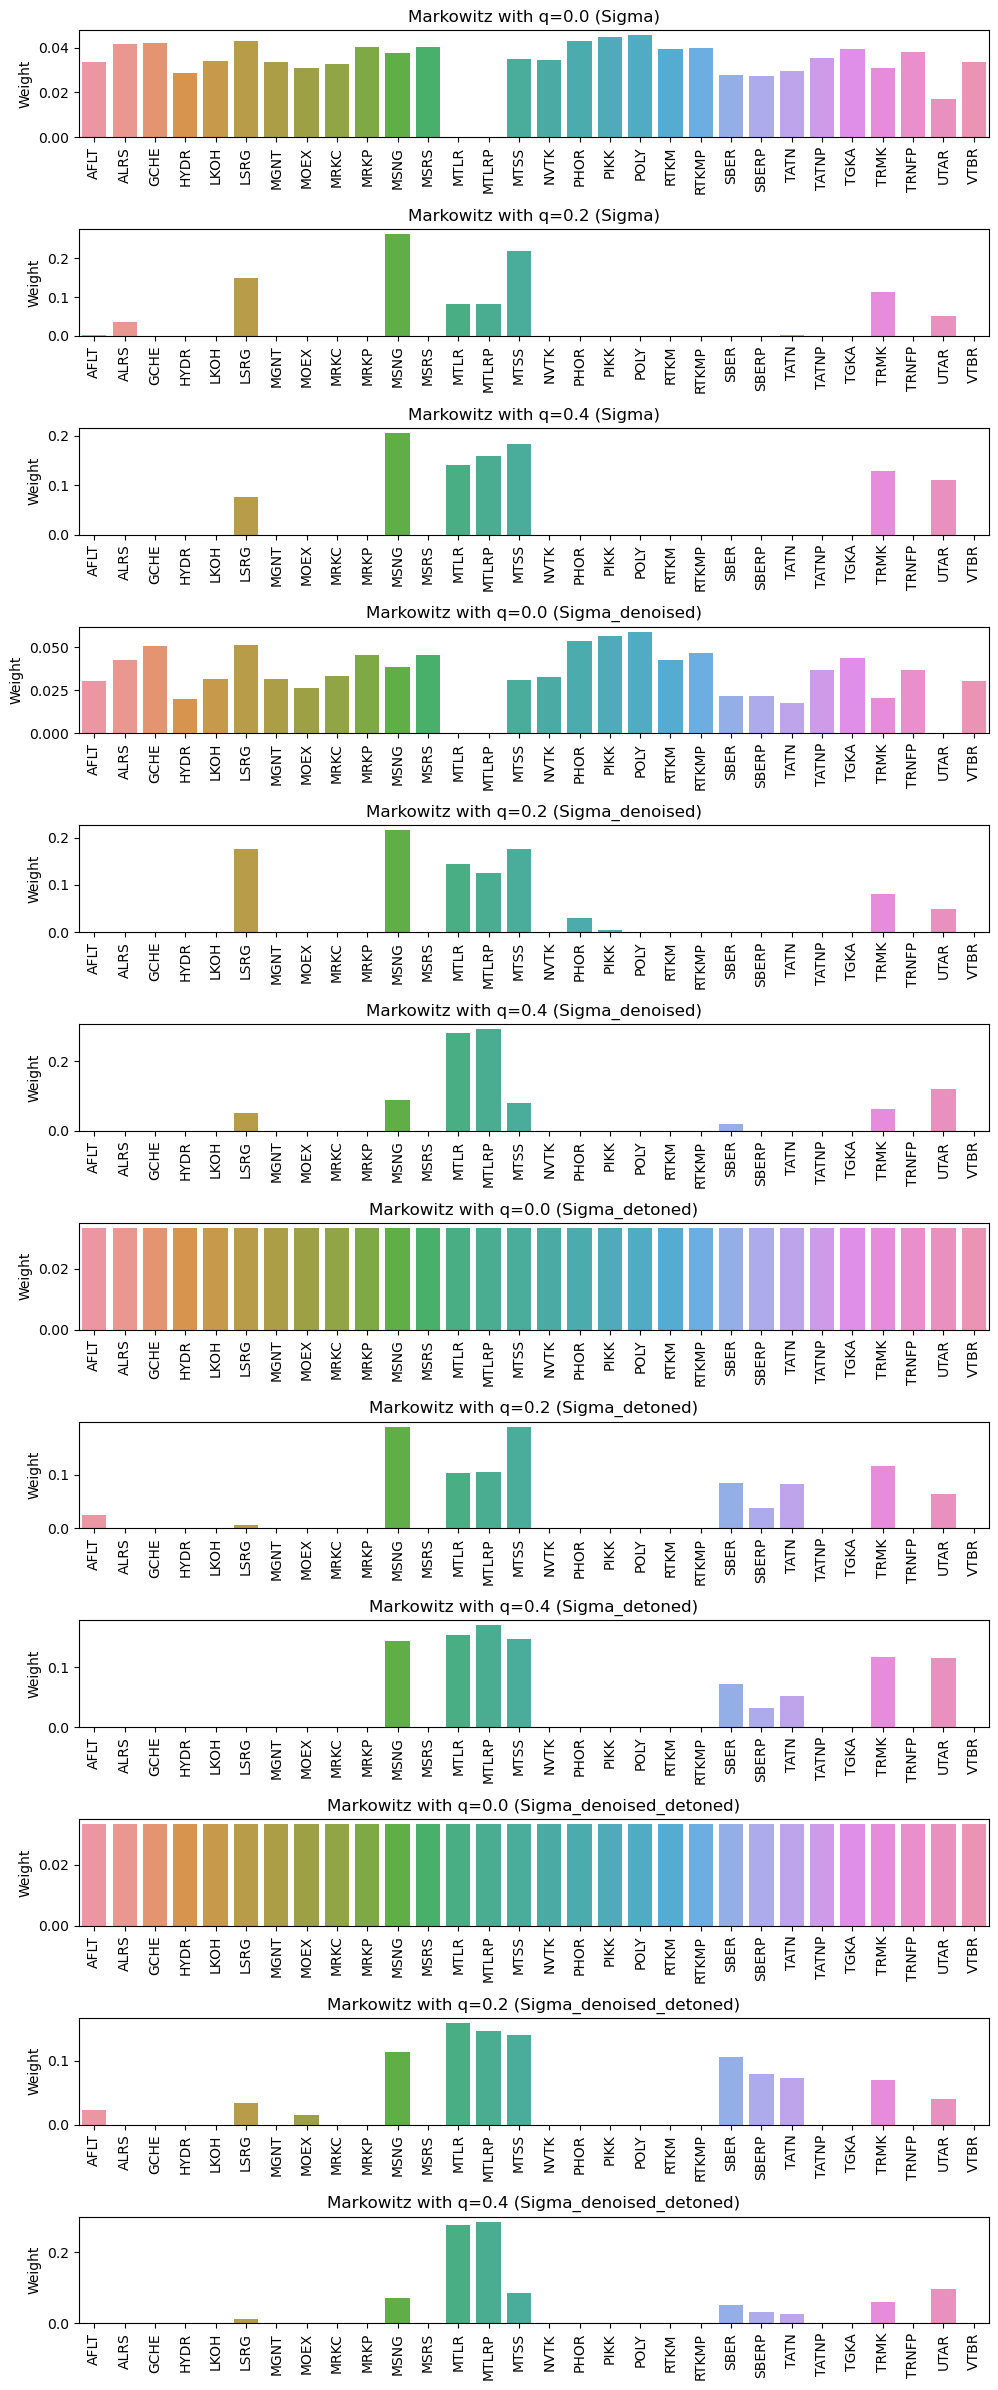

In [13]:
params = [0.0, 0.2, 0.4]
parameters = [{'q': q} for q in params]
names = [f'Markowitz with q={q}' for q in params]
min_variance_max_return_given_q_stats = try_method(MarkowitzMethod.MinVarianceMaxReturnGivenQ, parameters, names, 'cache/markowitz_q/', use_cache=True)